In [50]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
import pydotplus
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import classification_report_imbalanced
from IPython.display import Image
from sklearn.metrics import balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN
import seaborn as sns
from collections import Counter
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

# Check out data

In [10]:
# read data, display 5 first columns 
loan_df = pd.read_csv("lending_data.csv")
loan_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [13]:
# data info
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
loan_size           77536 non-null float64
interest_rate       77536 non-null float64
borrower_income     77536 non-null int64
debt_to_income      77536 non-null float64
num_of_accounts     77536 non-null int64
derogatory_marks    77536 non-null int64
total_debt          77536 non-null int64
loan_status         77536 non-null int64
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [14]:
# apply describe method 
loan_df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [15]:
# dataset columns 
loan_df.columns

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

# Data visualization

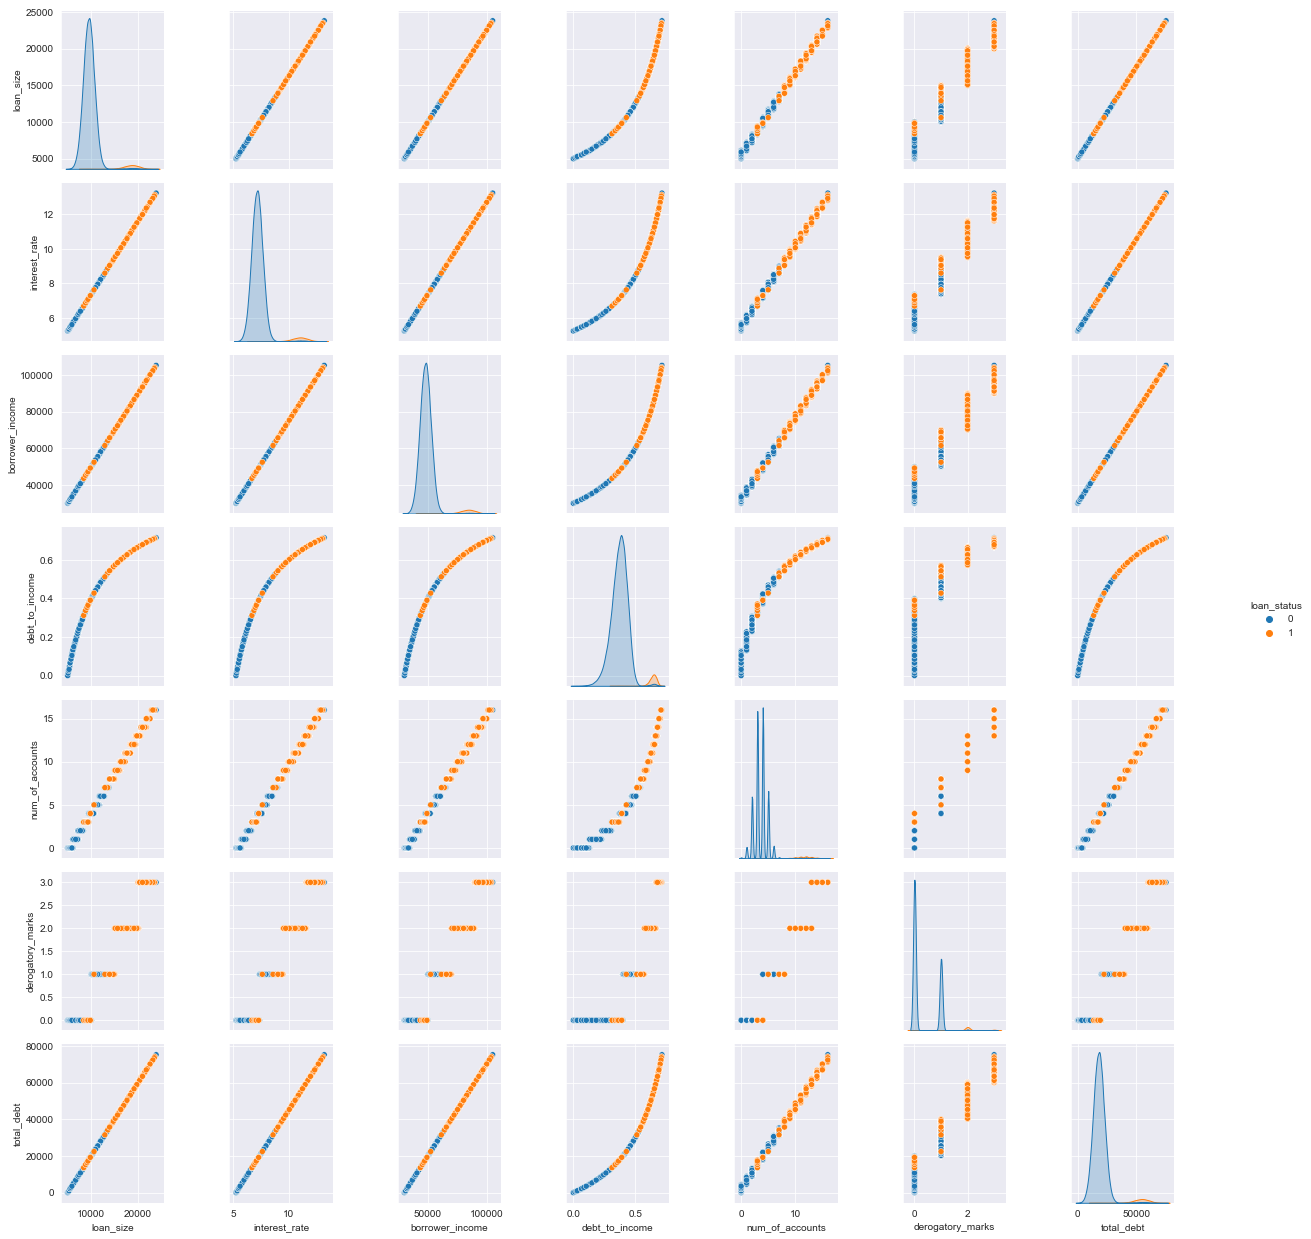

In [20]:
# see if our data has a normal distribution 
sns.pairplot(loan_df,hue="loan_status")

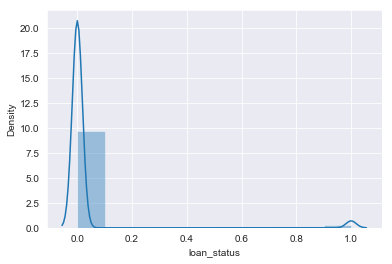

In [48]:
sns.distplot(loan_df['loan_status'],bins=10)

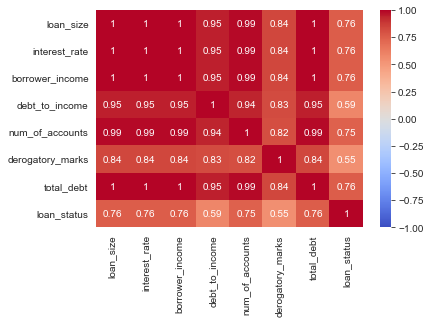

In [35]:
# visialize correlation between each row and column 
sns.heatmap(loan_df.corr(),annot=True,cmap="coolwarm",vmin=-1,vmax=1)

# Create a Logistic Regression Model with the Original Data
1. X and y arrays
2. Train Test Split
3. scale X_train, X_test

## Creating ,Training model

In [21]:
# y is target, rest of data has to scale and trained 
y = loan_df['loan_status']
X = loan_df.drop(columns="loan_status")

In [52]:
# train data for 70% and test it for 30%
# train: what you train on
# X_test : what you make prediction on
# y_test: what you check against
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101, stratify=y)

In [72]:
# scale X_train, y_test
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [54]:
#X array
X_train_scaled

array([[-0.19511373, -0.17374641, -0.17121284, ...,  0.08929104,
        -0.67425029, -0.17121284],
       [ 0.4262143 ,  0.42799775,  0.42632079, ...,  0.61425485,
         1.04543884,  0.42632079],
       [-0.43408605, -0.42344211, -0.42217696, ..., -0.43567277,
        -0.67425029, -0.42217696],
       ...,
       [ 1.09533679,  1.11184905,  1.10750912, ...,  1.13921866,
         1.04543884,  1.10750912],
       [-0.0995248 , -0.12200766, -0.12341015, ...,  0.08929104,
        -0.67425029, -0.12341015],
       [-0.57746944, -0.56403654, -0.56558503, ..., -0.43567277,
        -0.67425029, -0.56558503]])

In [55]:
# y array
X_test_scaled

array([[-0.29070266, -0.27834866, -0.27876889, ..., -0.43567277,
        -0.67425029, -0.27876889],
       [-0.14731927, -0.15912458, -0.15926217, ...,  0.08929104,
        -0.67425029, -0.15926217],
       [ 0.23503645,  0.24803688,  0.2470607 , ...,  0.08929104,
         1.04543884,  0.2470607 ],
       ...,
       [-0.57746944, -0.58428214, -0.58948638, ..., -0.43567277,
        -0.67425029, -0.58948638],
       [ 1.04754233,  1.05111226,  1.04775576, ...,  1.13921866,
         1.04543884,  1.04775576],
       [-0.05173034, -0.03090247, -0.02780477, ...,  0.08929104,
        -0.67425029, -0.02780477]])

# Fit the model, Predict and Evaluations

In [67]:
# model, fit, predict
model_logit_original = LogisticRegression()
model_logit_original.fit(X_train_scaled, y_train)
y_pred_logit_original = model_logit_original.predict(X_test_scaled)

In [90]:
# creat a new dataframe or Predicted and actual columns
results_model_logit_original = pd.DataFrame({
    "Prediction": y_pred_logit_original,
    "Actual": y_test
})
results_model_logit_original.head(2)

,Prediction,Actual
71149,0,0
19034,0,0


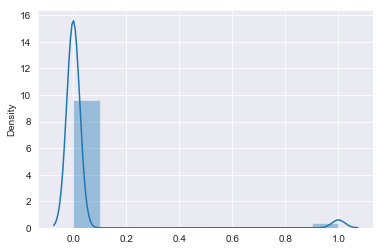

In [69]:
sns.distplot((y_pred_logit_original),bins=10)

In [108]:
# accuracy_score
accuracy_score(y_test, y_pred_logit_original)

0.9945284714894282

In [70]:
# confusion matrix
print(confusion_matrix(y_test, y_pred_logit_original))
# we can see we have 16 FN vs 124 FP

[[24638   124]
 [   16   809]]


In [71]:
# classification report
print(classification_report(y_test, y_pred_logit_original))
# our LR model is performing good with 99% accuracy

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     24762
           1       0.87      0.98      0.92       825

    accuracy                           0.99     25587
   macro avg       0.93      0.99      0.96     25587
weighted avg       1.00      0.99      0.99     25587



In [ ]:
'''
question: How well does the logistic regression model predict both 
the 0 (healthy loan) and 1 (high-risk loan) labels?

Answer: LR model predicted 100% precision of a healthy loan and 85% precision a risky loan.
'''

# Classification & Logistic problem

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101, stratify=y)

In [82]:
# scale X_train, y_test
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [83]:
# model, fit, predict
classifier_logit_original = LogisticRegression(solver='lbfgs', max_iter=200, random_state=101)
classifier_logit_original.fit(X_train_scaled, y_train) # portion that studying at home 
y_pred_classifier_logit_original = classifier_logit_original.predict(X_test_scaled)

In [84]:
# we can see that we are overfitting model by ~ 0.001 which is not bad 
print(f"training error: {1 - classifier_logit_original.score(X_train_scaled,y_train)}") # at home how much mistake I make 
print(f"test error: {1 - classifier_logit_original.score(X_test_scaled,y_test)}")      # at school how much mistake I make

training error: 0.006063639338582116
test error: 0.005471528510571755


In [89]:
# Store prediction in Dataframe 
results_classifier_logit_original = pd.DataFrame({
    "Prediction": y_pred_classifier_logit_original,
    "Actual": y_test
})
    
results_classifier_logit_original.head(5)

,Prediction,Actual
71149,0,0
19034,0,0
34225,0,0
44688,0,0
59416,0,0


In [93]:
# confusion matrix
print(confusion_matrix(y_test, y_pred_classifier_logit_original))
# we can see we have 16 FN vs 124 FP

[[24638   124]
 [   16   809]]


In [94]:
# classification report
print(classification_report(y_test, y_pred_classifier_logit_original))
# our LR model is performing good with 99% accuracy

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     24762
           1       0.87      0.98      0.92       825

    accuracy                           0.99     25587
   macro avg       0.93      0.99      0.96     25587
weighted avg       1.00      0.99      0.99     25587



# Statsmodel logit

In [65]:
import statsmodels.formula.api as smf
results_logit_original = smf.logit("y~X", data= loan_df).fit()

         Current function value: 0.018424
         Iterations: 35


In [66]:
# we can check p value and do hypothesis testing 
# look for Log-Likelihood 
print(results_logit_original.summary(yname="loan_status", xname=["Intercept"]+[k for k in X]))

                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                77536
Model:                          Logit   Df Residuals:                    77529
Method:                           MLE   Df Model:                            6
Date:                Fri, 02 Sep 2022   Pseudo R-squ.:                  0.8707
Time:                        11:01:45   Log-Likelihood:                -1428.6
converged:                      False   LL-Null:                       -11045.
                                        LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.922e-06   1.09e+06   1.77e-12      1.000   -2.13e+06    2.13e+06
loan_size            0.0040      0.002      2.245      0.025       0.001       0.007
interest_rate      -12.7572 

# Predict a Logistic Regression Model with Resampled Training Data

In [51]:
# imbalanced healthy and defaulted loans
Counter(y_train)

Counter({0: 50278, 1: 1671})

In [97]:
# RandomOverSampler brings the lowest to same as highest in our case is loan defaulting
ros = RandomOverSampler()
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train_scaled, y_train)
Counter(y_train_oversampled)

Counter({0: 50274, 1: 50274})

In [101]:
# import model, fit model then predict 
model_logit_resampled = LogisticRegression()
model_logit_resampled.fit(X_train_oversampled, y_train_oversampled)
y_pred_logit_resampled = model_logit_resampled.predict(X_test_scaled)

In [102]:
# classification report
# we lost 1% in pre compare to LR and the rest are the same 
print(classification_report_imbalanced(y_test, y_pred_logit_resampled))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.99      1.00      0.99      0.99     24762
          1       0.86      0.99      0.99      0.92      0.99      0.99       825

avg / total       1.00      0.99      0.99      0.99      0.99      0.99     25587



In [103]:
# accuracy_score is the same as LR Model output   
balanced_accuracy_score(y_test, y_pred_logit_resampled)

0.9942033614556027

In [ ]:
'''
question: How well does the logistic regression model, fit with oversampled data, predict both 
the 0 (healthy loan) and 1 (high-risk loan) labels?

Answer: both models have done the same results, non of them outperformed the other
precision : LR model  for 1 (risky_loan) is 87% compared to oversampled is 86%
recall : LR model for 1 (risky_loan) is 98% compared to oversampled is 99%

basically LR model fit with 99% accuracy showed in above cell
'''

# Write a Credit Risk Analysis Report